Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

print("Setup Complete")

Setup Complete


## Loading data
<br>
Loading train and test data from data folder 
in csv format

In [2]:
#train_data is for training
train_data = pd.read_csv("data/train.csv")
#as name suggests for test
test_data = pd.read_csv("data/test.csv")

#for checking if data is load properly
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Reshaping Data
<br>
Converting DataFrame to Numpy array and reshaping it for further use <br>
train_x  is the pixels of images <br>
train_y is the labels of images

In [3]:
train_x = np.array(train_data)[:,1:].reshape(42000,28,28)
train_y = np.array(train_data)[:,0].reshape(42000,1)
print("Shape Of Train Y Set \n{}".format(train_y.shape))
print("Shape Of Train X Set \n{}".format(train_x.shape))

Shape Of Train Y Set 
(42000, 1)
Shape Of Train X Set 
(42000, 28, 28)


Checking Random Image from train_x 

In [4]:
def random_image():
    rand = np.random.randint(0,42000)
    plt.imshow(train_x[rand])
    print(train_y[rand])

[1]


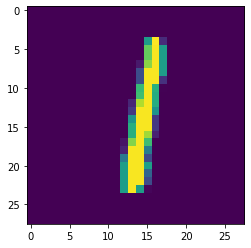

In [5]:
random_image()

Reshaping the pixels dataset for using it in tensorflow as input and normalizing it 

In [6]:
train_x = np.array(train_data)[:,1:].reshape(42000,28,28,1)/255.0

In [7]:
# Importing Tensorflow framework
import tensorflow as tf

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax")
])

2022-08-22 01:18:23.542895: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-08-22 01:18:23.778717: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-08-22 01:18:23.778770: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vaishnavpratap412): /proc/driver/nvidia/version does not exist
2022-08-22 01:18:23.779801: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-08-22 01:18:23.786453: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2593905000 Hz
2022-08-22 01:18:23.786930: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f9358000b60 initialized for platform Host (this does not guarantee that XLA will be used). Devices

In [9]:
# model summary for just a look
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               384120    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [10]:
model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])

In [11]:
history = model.fit(train_x,train_y,epochs = 10,verbose = 1,batch_size = 128,validation_split = 0.3)

Epoch 1/10
230/230 [==============================] - 11s 49ms/step - loss: 0.2712 - accuracy: 0.9190 - val_loss: 0.0795 - val_accuracy: 0.9764
Epoch 2/10
230/230 [==============================] - 11s 48ms/step - loss: 0.0694 - accuracy: 0.9781 - val_loss: 0.0508 - val_accuracy: 0.9837
Epoch 3/10
230/230 [==============================] - 11s 49ms/step - loss: 0.0464 - accuracy: 0.9859 - val_loss: 0.0439 - val_accuracy: 0.9873
Epoch 4/10
230/230 [==============================] - 11s 47ms/step - loss: 0.0333 - accuracy: 0.9895 - val_loss: 0.0501 - val_accuracy: 0.9840
Epoch 5/10
230/230 [==============================] - 11s 47ms/step - loss: 0.0256 - accuracy: 0.9920 - val_loss: 0.0480 - val_accuracy: 0.9858
Epoch 6/10
230/230 [==============================] - 11s 47ms/step - loss: 0.0178 - accuracy: 0.994

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'epoch')

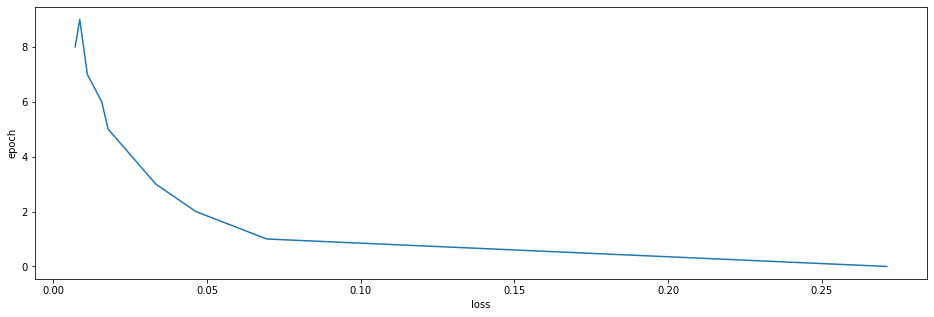

In [12]:
plt.figure(figsize =(16,5))
sns.lineplot(history.history["loss"],history.epoch)
plt.xlabel("loss")
plt.ylabel("epoch")

Converting Test DataFrame to numpy array

In [13]:
print("predicting On Test Set")
print(np.array(test_data).shape)
test_x = np.array(test_data).reshape(28000,28,28)

predicting On Test Set
(28000, 784)


In [14]:
def test_on_testset():
    rand = np.random.randint(0,28000)
    print(np.where(model.predict(test_x[rand].reshape(1,28,28,1)) == 1)[1])
    plt.imshow(test_x[rand])


[8]


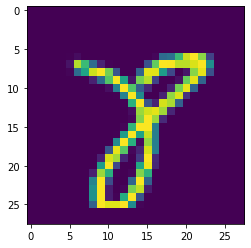

In [15]:
test_on_testset()

In [19]:
#saving Model in .tf extension
model.save("digit_prediction.tf")

INFO:tensorflow:Assets written to: digit_prediction.tf/assets
